In [1]:
import os
os.environ['HTTP_PROXY'] = 'https://proxy.jpmchase.net:8080'
os.environ['HTTPS_PROXY'] = 'https://proxy.jpmchase.net:8443'

In [2]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

In [4]:
juesx = web.get_data_yahoo('JUESX', start = '2017-01-01')
spy = web.get_data_yahoo('SPY', start = '2017-01-01')

[*********************100%***********************]  1 of 1 downloaded

In [35]:
spy.ix[0,'Adj Close']

223.17601000000002

In [45]:
spy.iloc[0]['Adj Close']

223.17601000000002

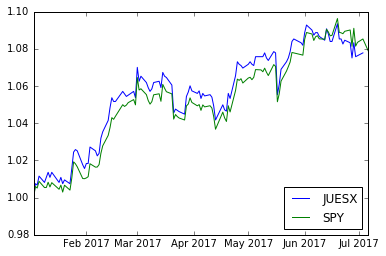

In [47]:
plt.plot(juesx['Adj Close'] / juesx.iloc[0]['Adj Close'], label = 'JUESX')
plt.plot(spy['Adj Close'] / spy.iloc[0]['Adj Close'], label = 'SPY')
plt.legend(loc = 'lower right')
plt.show()

In [49]:
100*(juesx.iloc[len(juesx)-1]['Adj Close'] / juesx.iloc[0]['Adj Close'] - 1)

7.7806460275240186

In [50]:
100*(spy.iloc[len(spy)-1]['Adj Close'] / spy.iloc[0]['Adj Close'] - 1)

7.870375046135103

In [52]:
jemsx = web.get_data_yahoo('JEMSX', start = '2017-01-01')

[*********************100%***********************]  1 of 1 downloaded

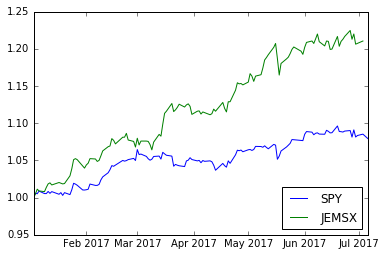

In [53]:
plt.plot(spy['Adj Close'] / spy.iloc[0]['Adj Close'], label = 'SPY')
plt.plot(jemsx['Adj Close'] / jemsx.iloc[0]['Adj Close'], label = 'JEMSX')

plt.legend(loc = 'lower right')
plt.show()

In [6]:
jpmHist = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Personal Investing/jpmorganfundsHistory.csv')

In [54]:
jpmHist.head(1)

,Trade_Date,Confirmation_Date,Fund_Name,Fund_Symbol,Fund_Code,Transaction_Description,Shares,Offering_Price,Gross_Amount
Trade_Date,,,,,,,,,
2017-07-03,07/03/2017,07/03/2017,Emerging Markets Equity Fund - I,JEMSX,1235.0,PERIODIC PURCHASE -ACH,5.848,25.65,150.0


In [8]:
jpmHist = jpmHist.loc[jpmHist[' Fund Symbol']==' JEMSX']

In [9]:
jpmHist.columns = [x.strip().replace(' ', '_') for x in jpmHist.columns]

In [10]:
del(jpmHist['Account_Number'])

In [11]:
jpmHist.index = pd.to_datetime(jpmHist['Trade_Date'])

In [12]:
jemsx = web.get_data_yahoo('JEMSX', start = '2016-11-23')
jemsx = jemsx['Adj Close']

[*********************100%***********************]  1 of 1 downloaded

In [15]:
df = pd.concat([jpmHist, jemsx], axis = 1)

In [28]:
df['Total Shares'] = df['Shares'].cumsum()
df['Total Shares'].fillna(method = 'pad', inplace = True)

In [29]:
df['MV'] = df['Total Shares'] * df['Adj Close']

In [21]:
df['Money in'] = df['Gross_Amount'].cumsum()
df['Money in'].fillna(method = 'pad', inplace = True)

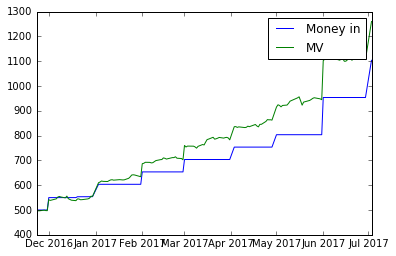

In [31]:
plt.plot(df['Money in'], label = 'Money in')
plt.plot(df['MV'], label = 'MV')
plt.legend()
plt.show()

In [ ]:
df.to_csv('H:/GIM Strategy and Execution/data.csv')